In [24]:
#importing all necessaary libraries
import pandas as pd
import numpy as np

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
# Metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay, recall_score, precision_score, f1_score, auc, precision_recall_curve, confusion_matrix
#from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve

# Visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
%matplotlib inline
sns.set_style('darkgrid')
random_state = 42

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Importing the data
df = pd.read_csv('Group_8_Clean_Data.csv')
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
# Display the column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

In [5]:
#splitting the data 
X = df.drop('DEFAULT', axis = 1)
y = df['DEFAULT']

In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 7)

In [7]:
# Function for perfromance metric of data
def Perf_Metric(Actual_Ouput, Prediction_Output):
  # Actual_Ouput is the actual output of training data taken from the dataset
  # TrainData_Prediction is the predicted output from the model for the training data
  Accuracy = round(accuracy_score(Actual_Ouput, Prediction_Output),3)
  F1Score = round(f1_score(Actual_Ouput, Prediction_Output),3)
  Precision = round(precision_score(Actual_Ouput, Prediction_Output),3)
  Recall = round(recall_score(Actual_Ouput, Prediction_Output),3)
  return [Accuracy, F1Score, Precision, Recall]

In [8]:
# Fit the model from training data using Random Forest
model = RandomForestClassifier()
rf = model.fit(X_train, y_train)

In [9]:
# Model fit with training data
y_train_predict = rf.predict(X_train)
# Make predictions on the test data
y_pred = rf.predict(X_test)

In [11]:
# Evaluate performance metric for training and testing data
Train_PM = Perf_Metric(y_train,y_train_predict)
Test_PM = Perf_Metric(y_test,y_pred)

RF_Train_PM = Train_PM
RF_Test_PM = Test_PM

In [12]:
# Create a table comparing the preformance on training and test data
models = pd.DataFrame({
    #'Model': ['RF'],
    'Dataset': ["Train","Test"],
    'Accuracy Score': [Train_PM[0], Test_PM[0]],
    'F1 Score': [Train_PM[1], Test_PM[1]],
    'Precision': [Train_PM[2], Test_PM[2]],
    'Recall': [Train_PM[3], Test_PM[3]],
})

In [13]:
models

,Dataset,Accuracy Score,F1 Score,Precision,Recall
0,Train,0.999,0.999,0.999,0.998
1,Test,0.818,0.467,0.630,0.371


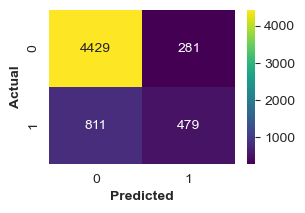

In [14]:
# Plot Confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.xlabel('Predicted',fontweight='bold')
plt.ylabel('Actual',fontweight='bold');

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.656


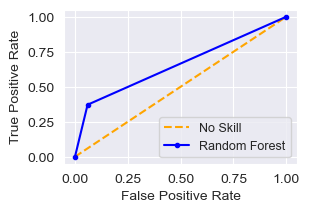

In [17]:
# ROC Curve
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]


# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, y_pred)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)

# plot the roc curve for the model
fig = plt.figure(figsize=(3, 2))
plt.plot(ns_fpr, ns_tpr, linestyle='--', color='orange', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', color='blue', label='Random Forest')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend(fontsize = 9)

# show the plot
plt.show()

### Random Forest is found to be the best algorithm with randomized search for hypertuning parameters

In [19]:
# Random Forest before randomized serach
# Fit the model from training data using Random Forest
model = RandomForestClassifier()
rf_bef_random = model.fit(X_train, y_train)

# Model fit with training data
#y_train_predict = rf_bef_random.predict(X_train)
# Make predictions on the test data
rf_y_pred_bef_random = rf_bef_random.predict(X_test)

# Evaluate the model after Randomized Search
accuracy_rf_bef_random = accuracy_score(y_test, rf_y_pred_bef_random)
print(f'Random Forest Accuracy before Randomized Search: {accuracy_rf_bef_random:.4f}')

Random Forest Accuracy before Randomized Search: 0.8167


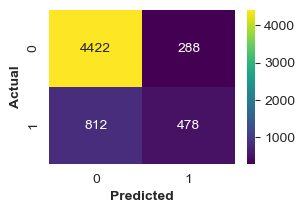

In [21]:
# Plot Confusion matrix
cm = confusion_matrix(y_test, rf_y_pred_bef_random)
fig = plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.xlabel('Predicted',fontweight='bold')
plt.ylabel('Actual',fontweight='bold');

No Skill: ROC AUC=0.500
Random Forest before randomized search: ROC AUC=0.655


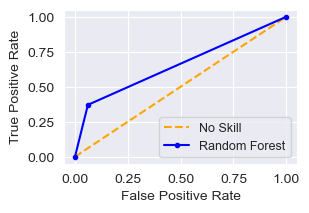

In [22]:
# ROC Curve
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]


# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, rf_y_pred_bef_random)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest before randomized search: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, rf_y_pred_bef_random)

# plot the roc curve for the model
fig = plt.figure(figsize=(3, 2))
plt.plot(ns_fpr, ns_tpr, linestyle='--', color='orange', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', color='blue', label='Random Forest')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend(fontsize = 9)

# show the plot
plt.show()

In [26]:
# Randomized Search for Random Forest
param_dist_rf = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search_rf = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=param_dist_rf,
                                       n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150, 200]},
                   random_state=42, scoring='accuracy')

In [28]:
# Get the best hyperparameters for Random Forest
best_params_rf_random = random_search_rf.best_params_

# Fit the model with the best hyperparameters on the entire training set
best_rf_model_random = RandomForestClassifier(**best_params_rf_random)
best_rf_model_random.fit(X_train, y_train)

# Predictions on the test set for Random Forest
rf_y_pred_after_random = best_rf_model_random.predict(X_test)

# Evaluate the model after Randomized Search
accuracy_rf_after_random = accuracy_score(y_test, rf_y_pred_after_random)
print(f'Random Forest Accuracy after Randomized Search: {accuracy_rf_after_random:.4f}')

Random Forest Accuracy after Randomized Search: 0.8212


In [29]:
# Display the best hyper-parameters for random forest
best_params_rf_random

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_depth': 10}

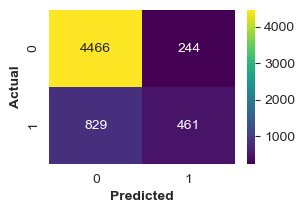

In [42]:
# Plot Confusion matrix
cm = confusion_matrix(y_test,  rf_y_pred_after_random)
fig = plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.xlabel('Predicted',fontweight='bold')
plt.ylabel('Actual',fontweight='bold');

No Skill: ROC AUC=0.500
Random Forest after randomized search: ROC AUC=0.655


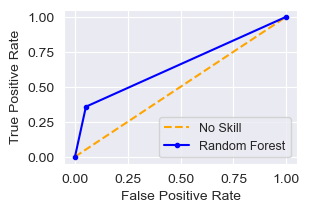

In [31]:
# ROC Curve
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]


# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, rf_y_pred_bef_random)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest after randomized search: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, rf_y_pred_after_random)

# plot the roc curve for the model
fig = plt.figure(figsize=(3, 2))
plt.plot(ns_fpr, ns_tpr, linestyle='--', color='orange', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', color='blue', label='Random Forest')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend(fontsize = 9)

# show the plot
plt.show()

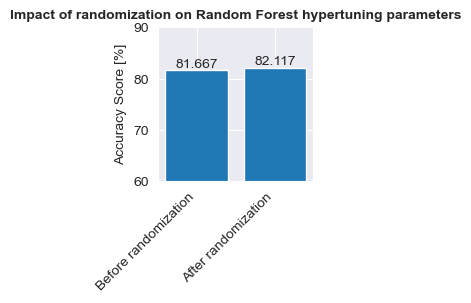

In [33]:
# Impact of randomized search in hypertuning parameters
hyperpar_names = ["Before randomization","After randomization"]
hyperpar_acc = [round(accuracy_rf_bef_random*100,3), round(accuracy_rf_after_random*100,3)]
#aman_uni = pd.DataFrame(review_freq, columns=['Unigram', 'Frequency'])
#aman_uni = aman_uni.set_index('Unigram')

# Plot the bar graph using matplotlib
fig = plt.figure(figsize=(2, 2))
bars = plt.bar(hyperpar_names, hyperpar_acc)
plt.title('Impact of randomization on Random Forest hypertuning parameters', fontsize=10, fontweight='bold')
#plt.xlabel('Kernel')
plt.ylabel('Accuracy Score [%]')
plt.ylim([60, 90])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(bar.get_height()), ha='center', va='bottom')
plt.show()

Use the best model from step 1 and step 3 and perform another variable selection using a Bi-directional elimination as a wrapper method

In [36]:
# Fit the model from training data using Random Forest
model = RandomForestClassifier()
rf = model.fit(X_train, y_train)

In [38]:
# Model fit with training data
y_train_predict = rf.predict(X_train)
# Make predictions on the test data
y_pred = rf.predict(X_test)

In [39]:
# Evaluate performance metric for training and testing data
Train_PM = Perf_Metric(y_train,y_train_predict)
Test_PM = Perf_Metric(y_test,y_pred)

RF_Step5_Train_PM = Train_PM
RF_Step5_Test_PM = Test_PM

In [40]:
# Create a table comparing the preformance on training and test data
models = pd.DataFrame({
    #'Model': ['RF'],
    'Dataset': ["Train","Test"],
    'Accuracy Score': [Train_PM[0], Test_PM[0]],
    'F1 Score': [Train_PM[1], Test_PM[1]],
    'Precision': [Train_PM[2], Test_PM[2]],
    'Recall': [Train_PM[3], Test_PM[3]],
})
models

,Dataset,Accuracy Score,F1 Score,Precision,Recall
0,Train,0.999,0.999,0.999,0.999
1,Test,0.819,0.473,0.630,0.378


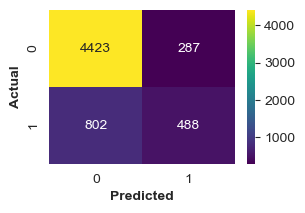

In [41]:
# Plot Confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.xlabel('Predicted',fontweight='bold')
plt.ylabel('Actual',fontweight='bold');

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.655


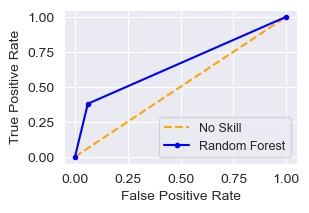

In [43]:
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)

# plot the roc curve for the model
fig = plt.figure(figsize=(3, 2))
plt.plot(ns_fpr, ns_tpr, linestyle='--', color='orange', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', color='blue', label='Random Forest')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend(fontsize = 9)

# show the plot
plt.show()

# Random Forest without Bidirectional Feature Elimation

In [44]:
# Fit the model from training data using Random Forest
model = RandomForestClassifier()
rf = model.fit(X_train, y_train)

In [45]:
# Model fit with training data
y_train_predict = rf.predict(X_train)
# Make predictions on the test data
y_pred = rf.predict(X_test)

In [46]:
# Evaluate performance metric for training and testing data
Train_PM = Perf_Metric(y_train,y_train_predict)
Test_PM = Perf_Metric(y_test,y_pred)

RF_Train_PM = Train_PM
RF_Test_PM = Test_PM

In [47]:
# Create a table comparing the preformance on training and test data
models = pd.DataFrame({
    #'Model': ['RF'],
    'Dataset': ["Train","Test"],
    'Accuracy Score': [Train_PM[0], Test_PM[0]],
    'F1 Score': [Train_PM[1], Test_PM[1]],
    'Precision': [Train_PM[2], Test_PM[2]],
    'Recall': [Train_PM[3], Test_PM[3]],
})
models

,Dataset,Accuracy Score,F1 Score,Precision,Recall
0,Train,0.999,0.999,1.000,0.998
1,Test,0.816,0.456,0.623,0.360


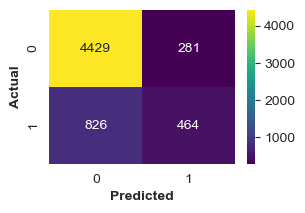

In [48]:
# Plot Confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.xlabel('Predicted',fontweight='bold')
plt.ylabel('Actual',fontweight='bold');

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.655


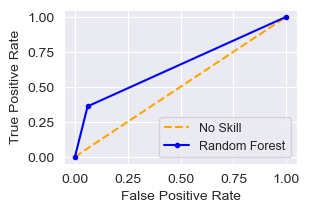

In [49]:
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)

# plot the roc curve for the model
fig = plt.figure(figsize=(3, 2))
plt.plot(ns_fpr, ns_tpr, linestyle='--', color='orange', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', color='blue', label='Random Forest')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend(fontsize = 9)

# show the plot
plt.show()

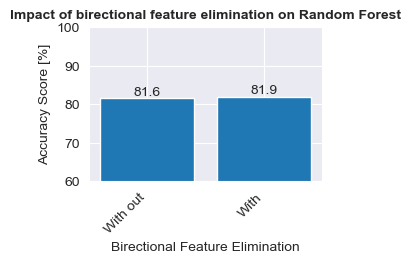

In [52]:
# Impact of Bidirectional elimination on Random Forest
hyperpar_names = ["With out","With"]
hyperpar_acc = [round(RF_Test_PM[0]*100,3), round(RF_Step5_Test_PM[0]*100,3)]
#aman_uni = pd.DataFrame(review_freq, columns=['Unigram', 'Frequency'])
#aman_uni = aman_uni.set_index('Unigram')

# Plot the bar graph using matplotlib
fig = plt.figure(figsize=(3, 2))
bars = plt.bar(hyperpar_names, hyperpar_acc)
plt.title('Impact of birectional feature elimination on Random Forest', fontsize=10, fontweight='bold')
plt.xlabel('Birectional Feature Elimination')
plt.ylabel('Accuracy Score [%]')
plt.ylim([60, 100])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(bar.get_height()), ha='center', va='bottom')
plt.show()

## Performing few more machine learning model training

In [55]:
# Fit the model from taining data using XG Boost
xgb_model = XGBClassifier(n_estimators=1000 ,random_state=42)
xgb = xgb_model.fit(X_train, y_train)

# Model fit with training data
y_train_predict = xgb.predict(X_train)
# Make predictions on the test data
y_pred = xgb.predict(X_test)

# Evaluate performance metrics
Train_PM = Perf_Metric(y_train,y_train_predict)
Test_PM = Perf_Metric(y_test,y_pred)

XGB_Train_PM = Train_PM
XGB_Test_PM = Test_PM

# Create a table comparing the preformance on training and test data
models = pd.DataFrame({
    #'Model': ['Logistic Regression'],
    'Dataset': ["Train","Test"],
    'Accuracy Score': [Train_PM[0], Test_PM[0]],
    'F1 Score': [Train_PM[1], Test_PM[1]],
    'Precision': [Train_PM[2], Test_PM[2]],
    'Recall': [Train_PM[3], Test_PM[3]],
})
models

,Dataset,Accuracy Score,F1 Score,Precision,Recall
0,Train,0.997,0.992,0.997,0.988
1,Test,0.801,0.445,0.554,0.371


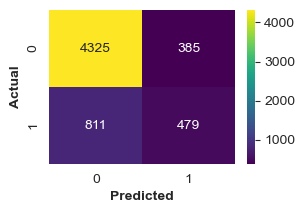

In [56]:
# Plot Confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.xlabel('Predicted',fontweight='bold')
plt.ylabel('Actual',fontweight='bold');

No Skill: ROC AUC=0.500
XG Boost: ROC AUC=0.655


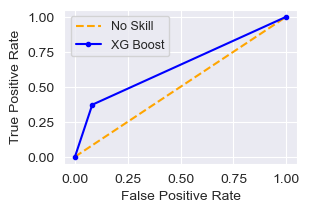

In [57]:
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XG Boost: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)

# plot the roc curve for the model
fig = plt.figure(figsize=(3, 2))
plt.plot(ns_fpr, ns_tpr, linestyle='--', color='orange', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', color='blue', label='XG Boost')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend(fontsize = 9)

# show the plot
plt.show()

## Extreme ML Model

The Extreme ML Model is a type of Deep Learning architecture comprising two or more hidden layers. As the depth of the model increases, it enhances its ability to comprehend and learn from the dataset. With an input layer receiving reshaped independent variables, the model culminates in a solitary output neuron responsible for binary classification.

In [61]:
!pip install scikeras
from tensorflow.keras import models, datasets, layers, optimizers
#from keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier
from scikeras.wrappers import KerasClassifier

# Function to build ann model
def build_ann():
  # creating the layers of the NN
  ann = models.Sequential()
  ann.add(layers.Input(shape=(len(X_train.columns), )))
  ann.add(layers.Dense(units=56, activation='relu'))
  ann.add(layers.Dense(units=128, activation='relu'))
  ann.add(layers.Dense(units=256, activation='relu'))
  ann.add(layers.Dense(units=128, activation='relu'))
  ann.add(layers.Dense(units=56, activation='relu'))
  ann.add(layers.Dense(units=1, activation='sigmoid'))
  ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
  return ann

model = KerasClassifier(build_fn=build_ann)
# Set params to test for in GridSeach
params={'batch_size':[200, 250],
        'epochs':[15, 20, 25]
        }

# Instantiate the RandomizedSearchCV object:
random_search_ann = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter = 4)

# Fit trained dataset with the best seeacrh
random_search_ann.fit(X_train, y_train)

Defaulting to user installation because normal site-packages is not writeable

Epoch 1/20


96/96 [==============================] - 3s 7ms/step - loss: 263.1045 - accuracy: 0.6836
Epoch 2/20
96/96 [==============================] - 1s 5ms/step - loss: 79.9517 - accuracy: 0.6891
Epoch 3/20
96/96 [==============================] - 1s 6ms/step - loss: 49.0382 - accuracy: 0.6885
Epoch 4/20
96/96 [==============================] - 1s 5ms/step - loss: 33.1557 - accuracy: 0.6959
Epoch 5/20
96/96 [==============================] - 1s 5ms/step - loss: 20.2030 - accuracy: 0.6915
Epoch 6/20
96/96 [==============================] - 1s 7ms/step - loss: 19.4495 - accuracy: 0.6919
Epoch 7/20
96/96 [==============================] - 1s 6ms/step - loss: 17.1806 - accuracy: 0.6949
Epoch 8/20
96/96 [==============================] - 1s 5ms/step - loss: 10.4238 - accuracy: 0.6957
Epoch 9/20
96/96 [==============================] - 1s 5ms/step - loss: 11.0271 - accuracy: 0.6962
Epoch 10/20
96/96 [========

RandomizedSearchCV(estimator=KerasClassifier(build_fn=<function build_ann at 0x0000025851B92F20>),
                   n_iter=4,
                   param_distributions={'batch_size': [200, 250],
                                        'epochs': [15, 20, 25]})

In [64]:
# Get the best ANN parameters
params = random_search_ann.best_params_
params

{'epochs': 25, 'batch_size': 200}

In [65]:
# Best ANN estimator
estimator = random_search_ann.best_estimator_
estimator

KerasClassifier(
	model=None
	build_fn=<function build_ann at 0x0000025851B92F20>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=200
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=25
	class_weight=None
)

In [67]:
# Train the best ANN model with train data
estimator.fit(X_train, y_train)

Epoch 1/25
120/120 [==============================] - 3s 7ms/step - loss: 250.7809 - accuracy: 0.6835
Epoch 2/25
120/120 [==============================] - 1s 6ms/step - loss: 58.2762 - accuracy: 0.6922
Epoch 3/25
120/120 [==============================] - 1s 6ms/step - loss: 48.0754 - accuracy: 0.6893
Epoch 4/25
120/120 [==============================] - 1s 6ms/step - loss: 34.6175 - accuracy: 0.6867
Epoch 5/25
120/120 [==============================] - 1s 6ms/step - loss: 16.3879 - accuracy: 0.6950
Epoch 6/25
120/120 [==============================] - 1s 6ms/step - loss: 14.1450 - accuracy: 0.6963
Epoch 7/25
120/120 [==============================] - 1s 7ms/step - loss: 9.9607 - accuracy: 0.6973
Epoch 8/25
120/120 [==============================] - 1s 7ms/step - loss: 12.5085 - accuracy: 0.6956
Epoch 9/25
120/120 [==============================] - 1s 6ms/step - loss: 7.3993 - accuracy: 0.6969
Epoch 10/25
120/120 [==============================] - 1s 6ms/step - loss: 6.0423 - accuracy

KerasClassifier(
	model=None
	build_fn=<function build_ann at 0x0000025851B92F20>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=200
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=25
	class_weight=None
)

In [68]:
# Prediction with test data
predictions = estimator.predict(X_test)

30/30 [==============================] - 0s 4ms/step


In [69]:
accuracy_EML_best = accuracy_score(y_test, predictions)*100
print(f'Extreme ML Model Accuracy with Hyperparameters {random_search_ann.best_params_} : {round(accuracy_EML_best,3)}')

Extreme ML Model Accuracy with Hyperparameters {'epochs': 25, 'batch_size': 200} : 73.133


No Skill: ROC AUC=0.500
Extreme ML: ROC AUC=0.655


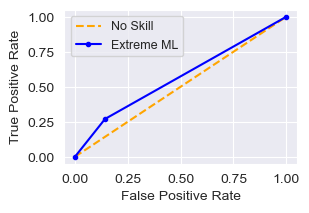

In [70]:
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Extreme ML: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, predictions)

# plot the roc curve for the model
fig = plt.figure(figsize=(3, 2))
plt.plot(ns_fpr, ns_tpr, linestyle='--', color='orange', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', color='blue', label='Extreme ML')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend(fontsize = 9)

# show the plot
plt.show()

## Deep Learning Model with two hidden layers - Each hidden layer with 100 neurons

In [72]:
# Define neural network with two hidden layers
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(100,100))
nn = model.fit(X_train, y_train)


In [73]:
# Model fit with training data
y_train_predict = nn.predict(X_train)
# Make predictions on the test data
y_pred = nn.predict(X_test)

# Evaluate performance metric for training and testing data
Train_PM = Perf_Metric(y_train,y_train_predict)
Test_PM = Perf_Metric(y_test,y_pred)

NN_Train_PM = Train_PM
NN_Test_PM = Test_PM

In [74]:
# Create a table comparing the preformance on training and test data
models = pd.DataFrame({
    #'Model': ['RF'],
    'Dataset': ["Train","Test"],
    'Accuracy Score': [Train_PM[0], Test_PM[0]],
    'F1 Score': [Train_PM[1], Test_PM[1]],
    'Precision': [Train_PM[2], Test_PM[2]],
    'Recall': [Train_PM[3], Test_PM[3]],
})
models

,Dataset,Accuracy Score,F1 Score,Precision,Recall
0,Train,0.776,0.016,0.402,0.008
1,Test,0.783,0.008,0.208,0.004


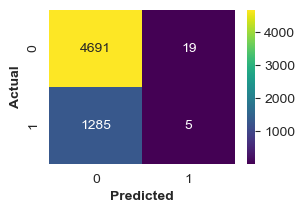

In [75]:
# Plot Confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.xlabel('Predicted',fontweight='bold')
plt.ylabel('Actual',fontweight='bold');

No Skill: ROC AUC=0.500
DL Neural Network: ROC AUC=0.655


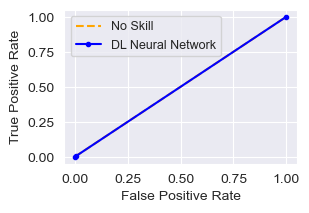

In [76]:
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('DL Neural Network: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)

# plot the roc curve for the model
fig = plt.figure(figsize=(3, 2))
plt.plot(ns_fpr, ns_tpr, linestyle='--', color='orange', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', color='blue', label='DL Neural Network')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend(fontsize = 9)

# show the plot
plt.show()

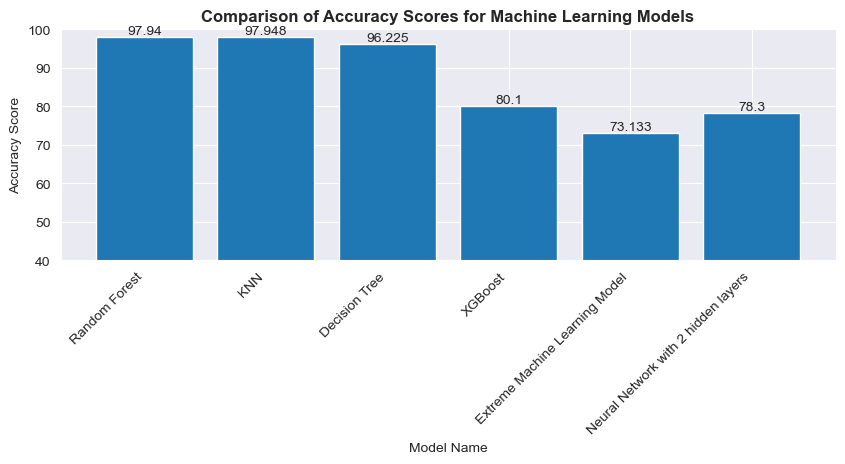

In [78]:
# Comparison of machine learning models with selected features from Step 2
# The
mlmodel_names = ["Random Forest","KNN","Decision Tree","XGBoost","Extreme Machine Learning Model","Neural Network with 2 hidden layers"]
mlmodel_acc = [97.940, 97.948, 96.225, round(XGB_Test_PM[0]*100,3), round(accuracy_EML_best,3), round((NN_Test_PM[0]*100),3)]

# Plot the bar graph using matplotlib
fig = plt.figure(figsize=(10, 3))
bars = plt.bar(mlmodel_names, mlmodel_acc)
plt.title('Comparison of Accuracy Scores for Machine Learning Models', fontsize=12, fontweight='bold')
plt.xlabel('Model Name')
plt.ylabel('Accuracy Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.ylim([40, 100])
#plt.tight_layout()
# Adding value labels on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(bar.get_height()), ha='center', va='bottom')
plt.show()


Observations:
    
    Random Forest, KNN are found to be giving high accuracy.